在這裡，我們示範如何使用 SHAP 值來理解 LightGBM 模型預測。

In [ ]:
! pip install shap

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score ,roc_curve ,classification_report, confusion_matrix ,r2_score ,mean_squared_error, mean_absolute_error ,explained_variance_score

import shap
# print the JS visualization code to the notebook
shap.initjs()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Load dataset

In [ ]:
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

In [ ]:
X # 32561 rows × 12 columns

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39
32557,40.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
32558,58.0,4,9.0,6,1,1,4,0,0.0,0.0,40.0,39
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39


# Train the model

In [ ]:
params = {
    "max_bin": 512,  # 使用的最大分箱數，用於數值特徵的離散化，增加此值可以提高模型的準確性，但會增加計算量
    "learning_rate": 0.05,  # 學習率，控制每次迭代更新的幅度，較小的學習率通常可以提高模型的表現，但需要更多的迭代次數
    "boosting_type": "gbdt",  # 提升類型，這裡使用梯度提升樹（Gradient Boosting Decision Tree）
    "objective": "binary",  # 目標函數，這裡設定為二分類任務
    "metric": "binary_logloss",  # 評估指標，這裡使用二元交叉熵損失
    "num_leaves": 10,  # 每棵樹的最大葉子數，過小可能導致欠擬合，過大則可能導致過擬合
    "verbose": -1,  # 日誌顯示級別，-1 表示不輸出日誌
    "min_data": 100,  # 在一個葉子上至少需要的數據數量，控制過擬合
    "boost_from_average": True,  # 是否使用基於平均的提升，通常會加快收斂速度
    "early_stopping_round": 50,  # 如果在指定的迭代次數內未看到性能提升，則提前停止訓練
}
model = lgb.train(
    params,
    d_train,
    10000,
    valid_sets=[d_test],
)

# Explain predictions
Tree SHAP 來解釋整個資料集（32561 個樣本）

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)

In [ ]:
shap.force_plot(explainer.expected_value, shap_values.values[1, :], X_display.iloc[0, :])

# Visualize many predictions

In [ ]:
shap.force_plot(explainer.expected_value, shap_values.values[:1000, :], X_display.iloc[:1000, :])

# SHAP Summary Plot

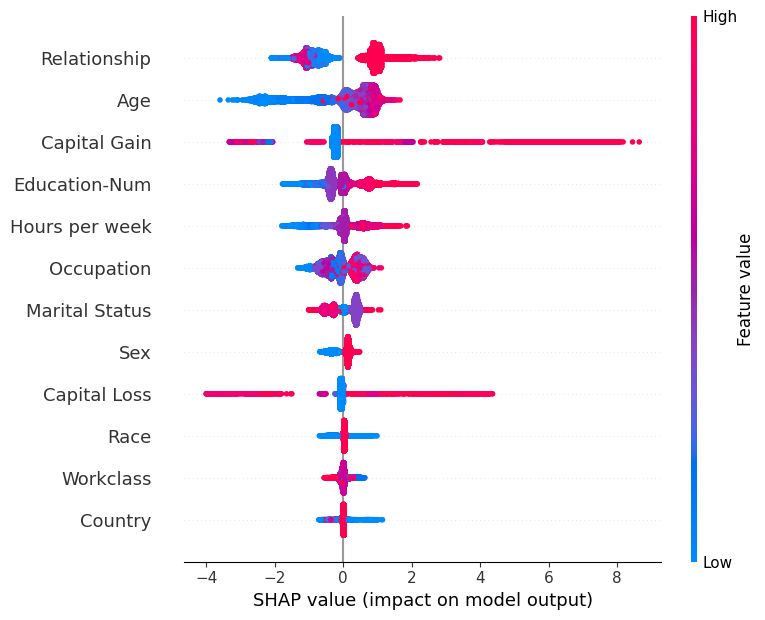

In [ ]:
shap.summary_plot(shap_values, X)

# SHAP Dependence Plots

SHAP dependence plots 顯示單一特徵對整個資料集的影響。

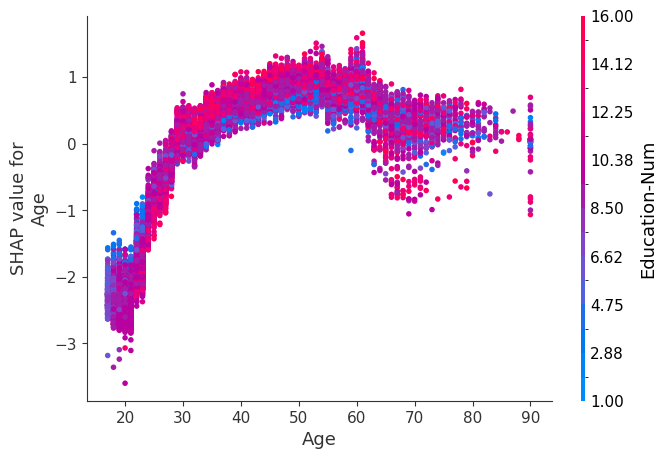

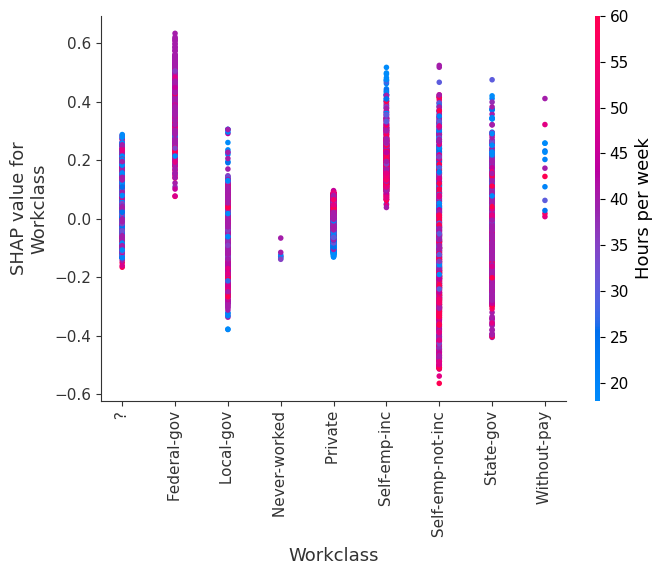

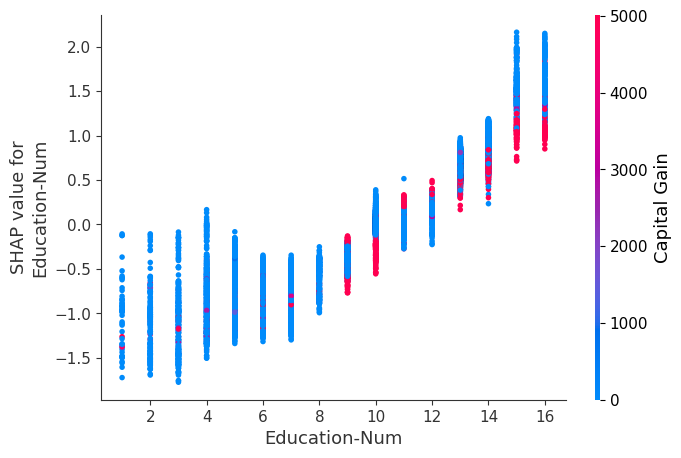

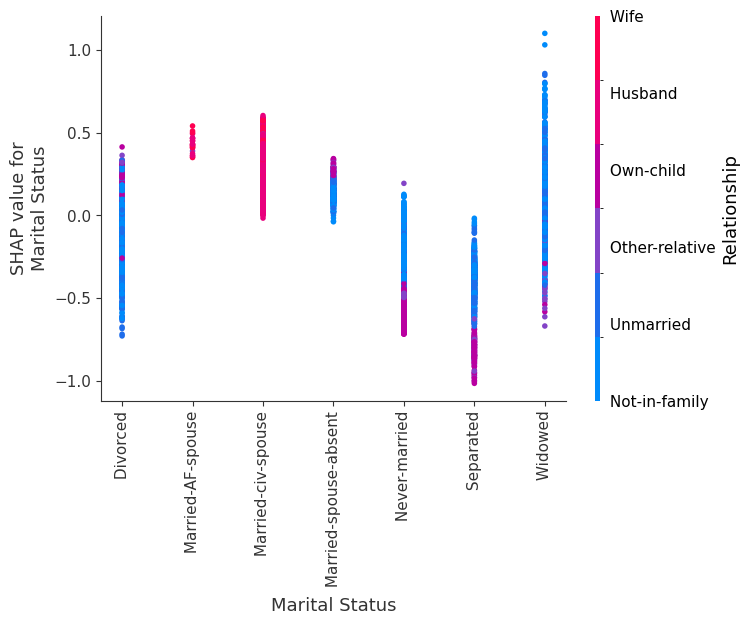

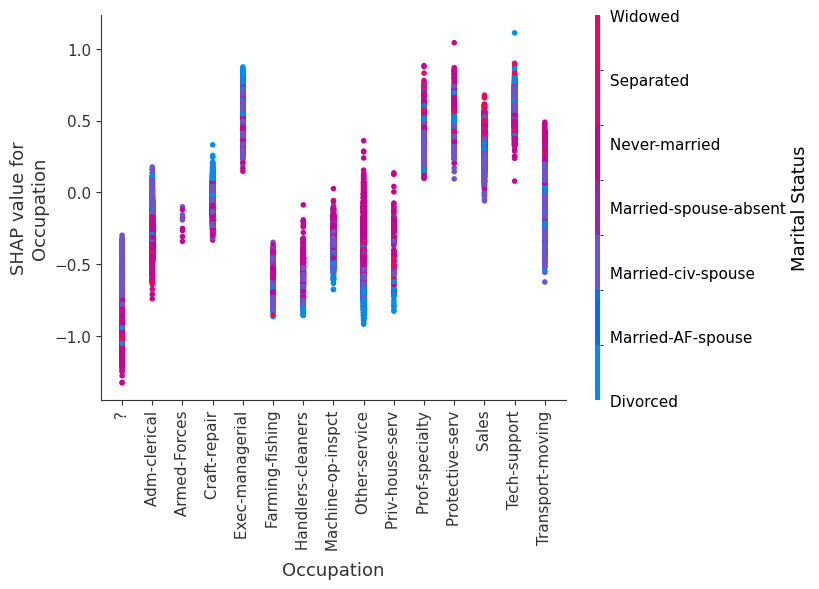

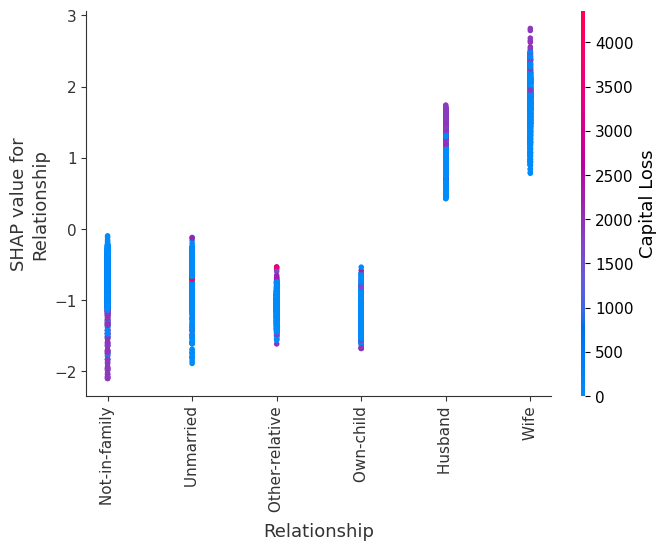

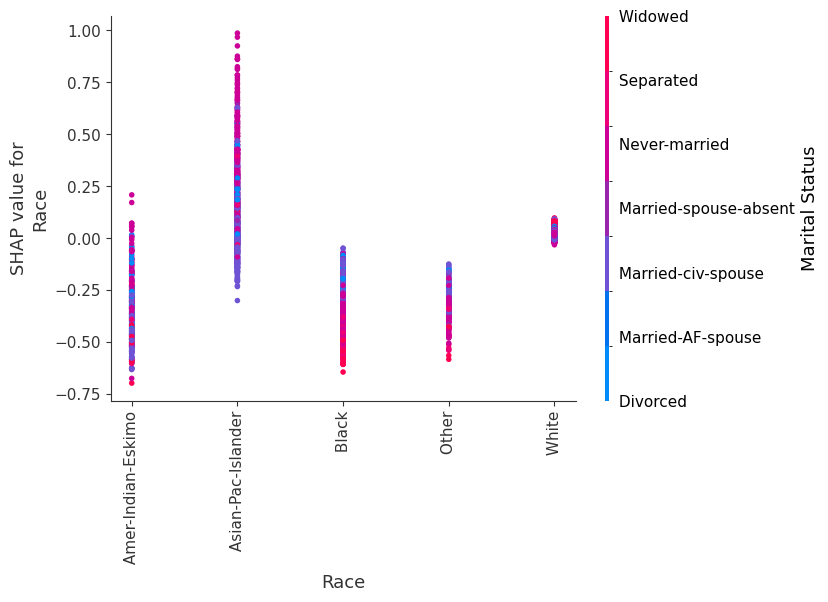

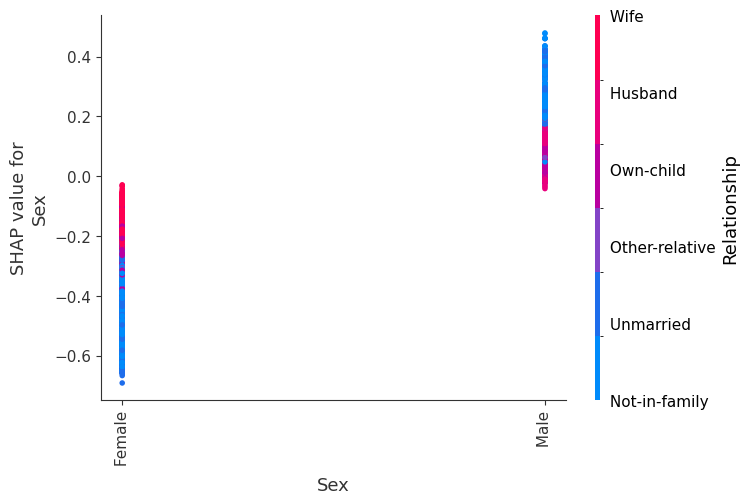

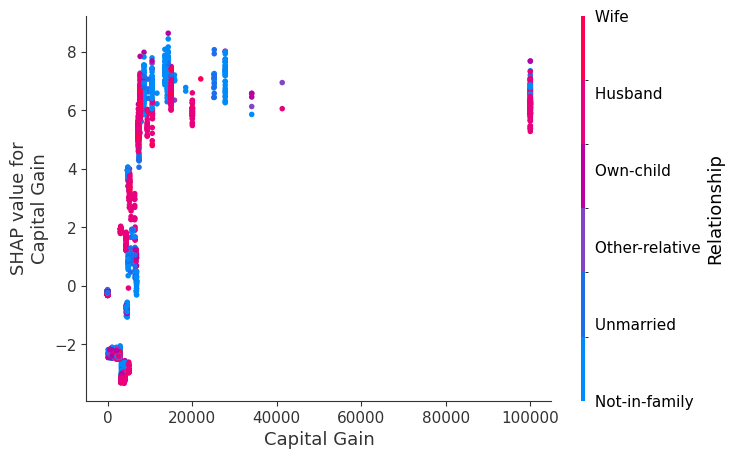

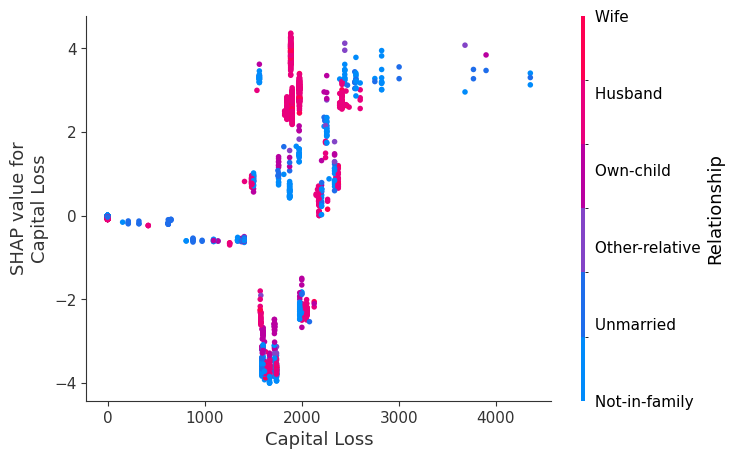

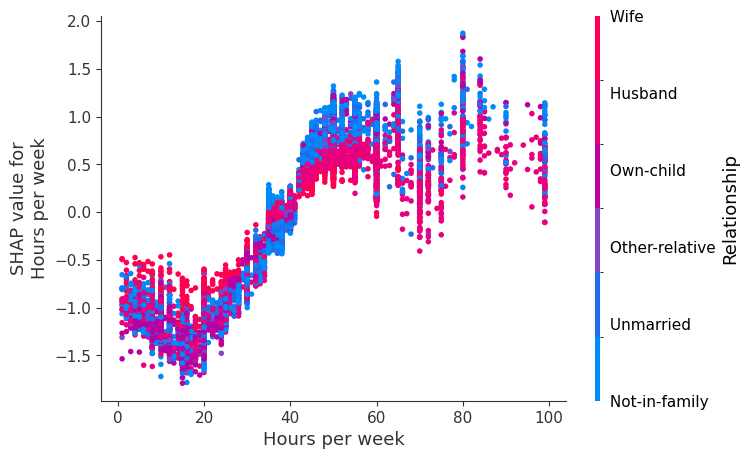

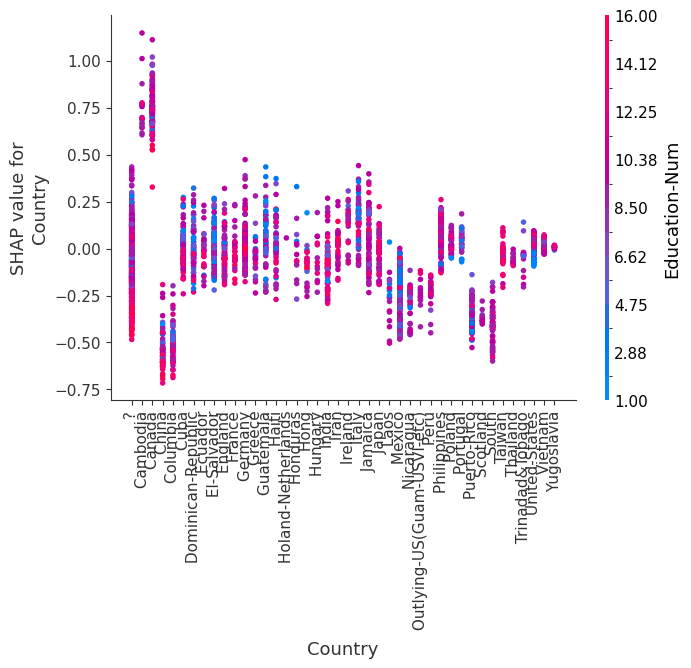

In [ ]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values.values, X, display_features=X_display)

https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20LightGBM.html